In [1]:
import numpy as np
import pandas as pd

In [2]:
df_s = pd.DataFrame(dict(v1 = [100, 200, 300],
                         v2 = [400, 500, 600],
                         shape = ["A", "B", "C"]))
df_s

v1   v2 shape
0  100  400     A
1  200  500     B
2  300  600     C

In [3]:
df_s.v1

0    100
1    200
2    300
Name: v1, dtype: int64

In [4]:
df_s.shape

(3, 3)

In [5]:
df_s["shape"]

0    A
1    B
2    C
Name: shape, dtype: object

In [6]:
df_s.iloc[:2, ]

v1   v2 shape
0  100  400     A
1  200  500     B

In [7]:
df_s.loc[:2, ]

v1   v2 shape
0  100  400     A
1  200  500     B
2  300  600     C

In [8]:
df_s["shape"] == "B"

0    False
1     True
2    False
Name: shape, dtype: bool

* 필터링: https://datadoctorblog.com/2023/04/08/Py-Basic-Pandas-Filtering/

In [9]:
df_s.loc[df_s["shape"] == "B", ]

v1   v2 shape
1  200  500     B

In [10]:
df_s.loc[df_s["shape"] != "B", ]

v1   v2 shape
0  100  400     A
2  300  600     C

In [ ]:
df_s.loc[(df_s["shape"] == "B") | (df_s["shape"] == "C"), ]

In [ ]:
df_s.loc[df_s["shape"].isin(["B", "C"]), ]

In [ ]:
condi_1 = df_s["shape"] == "B"
condi_2 = df_s["shape"] == "C"
df_s.loc[condi_1 | condi_2, ]

In [14]:
df = pd.read_csv("krx_202105_utf8.csv")
df.head(2)

지수명        종가     대비   등락률        시가        고가        저가        거래량  \
0  KRX 300   1901.05 -11.63 -0.61   1913.15   1929.94   1896.65  279548840   
1  KTOP 30  11520.28 -86.30 -0.74  11609.44  11702.14  11490.84   50048566   

             거래대금            상장시가총액        날짜  
0  13488481375036  2028800954161500  20210503  
1   5645660149606  1208343758559140  20210503

In [17]:
df["지수명"].unique()

array(['KRX 300', 'KTOP 30', 'KRX 100', 'KRX Mid 200', 'KRX 자동차',
       'KRX 반도체', 'KRX 헬스케어', 'KRX 은행', 'KRX 에너지화학', 'KRX 철강', 'KRX 방송통신',
       'KRX 건설', 'KRX 증권', 'KRX 기계장비', 'KRX 보험', 'KRX 운송', 'KRX 경기소비재',
       'KRX 필수소비재', 'KRX 미디어&엔터테인먼트', 'KRX 정보기술', 'KRX 유틸리티',
       'KRX 300 정보기술', 'KRX 300 금융', 'KRX 300 자유소비재', 'KRX 300 산업재',
       'KRX 300 헬스케어', 'KRX 300 커뮤니케이션서비스', 'KRX 300 소재', 'KRX 300 필수소비재'],
      dtype=object)

In [19]:
df_sub = df.loc[df["지수명"] == "KRX 300", ]
df_sub.head(2)

지수명       종가     대비   등락률       시가       고가       저가        거래량  \
0   KRX 300  1901.05 -11.63 -0.61  1913.15  1929.94  1896.65  279548840   
29  KRX 300  1916.40  15.35  0.81  1903.57  1916.40  1892.36  244040965   

              거래대금            상장시가총액        날짜  
0   13488481375036  2028800954161500  20210503  
29  11708937073166  2043945386926060  20210504

In [22]:
df.loc[df["종가"] == df["종가"].max(), ["지수명", "종가", "날짜"]]

지수명        종가        날짜
117  KTOP 30  11869.29  20210510

In [23]:
df["종가"].idxmax()

117

In [24]:
df.loc[117, ["지수명", "종가", "날짜"]]

지수명     KTOP 30
종가     11869.29
날짜     20210510
Name: 117, dtype: object

In [25]:
df.loc[[117], ["지수명", "종가", "날짜"]]

지수명        종가        날짜
117  KTOP 30  11869.29  20210510

In [26]:
df.loc[df["종가"].idxmax(), ["지수명", "종가", "날짜"]]

지수명     KTOP 30
종가     11869.29
날짜     20210510
Name: 117, dtype: object

In [27]:
df.loc[[df["종가"].idxmax()], ["지수명", "종가", "날짜"]]

지수명        종가        날짜
117  KTOP 30  11869.29  20210510

* 결측치 처리: https://datadoctorblog.com/2023/04/24/Py-Basic-Pandas-Missing/

In [28]:
df = pd.read_csv("iris_missing.csv")
df.head(2)

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0           5.1          NaN           NaN          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa

In [30]:
df_sub = df.head()
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  5 non-null      float64
 1   Sepal.Width   4 non-null      float64
 2   Petal.Length  4 non-null      float64
 3   Petal.Width   5 non-null      float64
 4   Species       5 non-null      object 
dtypes: float64(4), object(1)
memory usage: 328.0+ bytes


In [31]:
df_sub.count() # 엑셀의 COUNTA() 함수와 같음.

Sepal.Length    5
Sepal.Width     4
Petal.Length    4
Petal.Width     5
Species         5
dtype: int64

In [33]:
len(df_sub) - df_sub.count() # 결측값 개수

Sepal.Length    0
Sepal.Width     1
Petal.Length    1
Petal.Width     0
Species         0
dtype: int64

In [34]:
df_sub.isna().sum() # 🌟🌟🌟🌟🌟

Sepal.Length    0
Sepal.Width     1
Petal.Length    1
Petal.Width     0
Species         0
dtype: int64

In [ ]:
df_sub.loc[df_sub["Sepal.Width"].isna(), ]

In [ ]:
df_sub.loc[df_sub["Sepal.Width"].notna(), ]

In [ ]:
df_sub.dropna()

In [38]:
df_sub["Sepal.Width"] = df_sub["Sepal.Width"].fillna(-999)
df_sub["Petal.Length"] = df_sub["Petal.Length"].fillna(df_sub["Petal.Length"].mean())

C:\Users\Encaion\AppData\Local\Temp\ipykernel_18916\1739428370.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub["Sepal.Width"] = df_sub["Sepal.Width"].fillna(-999)
C:\Users\Encaion\AppData\Local\Temp\ipykernel_18916\1739428370.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub["Petal.Length"] = df_sub["Petal.Length"].fillna(df_sub["Petal.Length"].mean())


In [39]:
df_sub

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0           5.1       -999.0           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

### 인덱스 관련

In [40]:
df_sub2 = df.head().copy()
df_sub2["Sepal.Width"] = df_sub2["Sepal.Width"].fillna(-999)
df_sub2["Petal.Length"] = df_sub2["Petal.Length"].fillna(df_sub2["Petal.Length"].mean())
df_sub2

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0           5.1       -999.0           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

.set_index()와 .reset_index()를 연쇄(method chaining)로 썼을 때 (기존의 인덱스가 필요 없는 경우) 지정한 변수를 가장 앞쪽으로 옮길 수 있음. 이 작업은 머신러닝 모델링시 종속변수를 가장 앞으로 옮길 때 매우 유용하게 사용 가능.

In [41]:
df_sub2.set_index("Species").reset_index() 

Species  Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
0  setosa           5.1       -999.0           1.4          0.2
1  setosa           4.9          3.0           1.4          0.2
2  setosa           4.7          3.2           1.3          0.2
3  setosa           4.6          3.1           1.5          0.2
4  setosa           5.0          3.6           1.4          0.2

* 원소/조합 세기: https://datadoctorblog.com/2023/04/04/Py-Basic-Pandas-Counting/

In [42]:
df = pd.read_csv("bike.csv")
df.head(1)

datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16

In [43]:
df["season"].unique()

array([1, 2, 3, 4], dtype=int64)

In [44]:
df["season"].nunique()

4

In [45]:
df["season"].value_counts()

season
4    2734
2    2733
3    2733
1    2686
Name: count, dtype: int64

In [46]:
df["season"].value_counts(normalize = True)

season
4    0.251148
2    0.251056
3    0.251056
1    0.246739
Name: proportion, dtype: float64

* crosstab(): https://datadoctorblog.com/2023/05/06/Py-Basic-Pandas-Crosstab/

In [47]:
pd.crosstab(df["season"], df["holiday"])

holiday     0   1
season           
1        2615  71
2        2685  48
3        2637  96
4        2638  96

In [48]:
sum((df["season"] == 1) & (df["holiday"] == 0))

2615

In [49]:
pd.crosstab(df["season"], df["holiday"], normalize = "index")

holiday         0         1
season                     
1        0.973567  0.026433
2        0.982437  0.017563
3        0.964874  0.035126
4        0.964887  0.035113

In [52]:
pd.crosstab(df["season"], df["holiday"],
            values = df["count"],
            aggfunc = "mean")

holiday           0           1
season                         
1        117.494837   73.929577
2        215.562756  197.833333
3        234.293136  237.822917
4        198.560273  210.750000

* .groupby(): https://datadoctorblog.com/2023/04/28/Py-Basic-Pandas-Groupby/

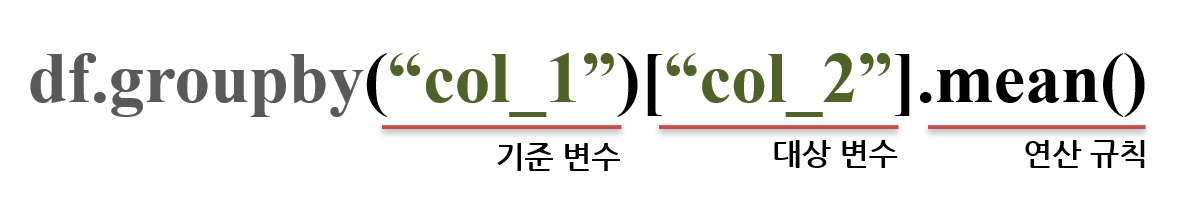

In [55]:
df.groupby(["season", "holiday"])["count"].mean()

season  holiday
1       0          117.494837
        1           73.929577
2       0          215.562756
        1          197.833333
3       0          234.293136
        1          237.822917
4       0          198.560273
        1          210.750000
Name: count, dtype: float64

In [54]:
df.pivot_table(index = "season", columns = "holiday",
               values = "count", 
               aggfunc = "mean")

holiday           0           1
season                         
1        117.494837   73.929577
2        215.562756  197.833333
3        234.293136  237.822917
4        198.560273  210.750000

In [56]:
df = pd.read_csv("diamonds.csv")
df.head(2)

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31

In [58]:
df.groupby("cut")["price"].agg(["max", "min"])

max  min
cut                  
Fair       18574  337
Good       18788  327
Ideal      18806  326
Premium    18823  326
Very Good  18818  336

In [ ]:
df.groupby(["cut", "color"])["price"].agg(["max", "min"])

In [ ]:
df.groupby("cut")[["price", "table"]].agg(["max", "min"])

In [ ]:
df.groupby("cut")[["price", "table"]].agg({"price": "min",
                                           "table": "max"})

* 신규변수 생성: https://datadoctorblog.com/2023/04/12/Py-Basic-Pandas-New-Columns/

* 문자열 데이터 처리: https://datadoctorblog.com/2023/04/20/Py-Basic-Pandas-String-Data/

In [61]:
df_t = pd.DataFrame(dict(v1 = [100, 200, 300],
                         v2 = ["abc", "bbb", "cba"], 
                         v3 = [123, "1234-5678", "010-1234-5678"]))
df_t

v1   v2             v3
0  100  abc            123
1  200  bbb      1234-5678
2  300  cba  010-1234-5678

In [62]:
df_t["v2"].replace("a", "❌")

0    abc
1    bbb
2    cba
Name: v2, dtype: object

In [63]:
df_t["v2"].replace("abc", "❌")

0      ❌
1    bbb
2    cba
Name: v2, dtype: object

In [64]:
df_t["v2"].replace({"abc": "❌", "cba": "❤"})

0      ❌
1    bbb
2      ❤
Name: v2, dtype: object

In [65]:
df_t["v2"].str.replace("a", "@")

0    @bc
1    bbb
2    cb@
Name: v2, dtype: object

In [66]:
df_t["v2"].str.replace(pat = "a", repl = "") # pattern, replacement

0     bc
1    bbb
2     cb
Name: v2, dtype: object

In [67]:
df_t["v2"].str.replace("abc", "@")

0      @
1    bbb
2    cba
Name: v2, dtype: object

In [68]:
df_t["v2"].str.contains("a")

0     True
1    False
2     True
Name: v2, dtype: bool

In [70]:
df_t.loc[df_t["v2"].str.contains("a"), ]

v1   v2             v3
0  100  abc            123
2  300  cba  010-1234-5678

In [71]:
df_t.loc[~df_t["v2"].str.contains("a"), ] # ~ 는 True, False 반전

v1   v2         v3
1  200  bbb  1234-5678

In [72]:
df_t.loc[df_t["v2"].str.contains("^[^a]+?$"), ] # 정규표현식으로 위 패턴을 반전시키려면 매우 어려움

v1   v2         v3
1  200  bbb  1234-5678

In [73]:
df_t.loc[df_t["v2"].isin(["abc", "bbb"]), ]

v1   v2         v3
0  100  abc        123
1  200  bbb  1234-5678

In [74]:
df_t.loc[~df_t["v2"].isin(["abc", "bbb"]), ]

v1   v2             v3
2  300  cba  010-1234-5678

In [75]:
df_t["v3"]

0              123
1        1234-5678
2    010-1234-5678
Name: v3, dtype: object

In [78]:
df_t["v3"].str.split("-")

0                  NaN
1         [1234, 5678]
2    [010, 1234, 5678]
Name: v3, dtype: object

In [79]:
df_t["v3"].astype("str").str.split("-")

0                [123]
1         [1234, 5678]
2    [010, 1234, 5678]
Name: v3, dtype: object

In [80]:
df_t["v3"].astype("str").str.split("-").explode()

0     123
1    1234
1    5678
2     010
2    1234
2    5678
Name: v3, dtype: object

In [81]:
df_t_v3 = df_t["v3"].astype("str").str.split("-", expand = True)
df_t_v3

0     1     2
0   123  None  None
1  1234  5678  None
2   010  1234  5678

In [82]:
df_t_v3.fillna("🤔")

0     1     2
0   123     🤔     🤔
1  1234  5678     🤔
2   010  1234  5678

 > **기출유형**: 변수의 접두사/접미사 추가하기.

In [84]:
# df_t_v3.add_prefix("col_") # Pandas 2.0.0 부터 가능

In [85]:
df_t_v3.columns = "v3_" + df_t_v3.columns.astype("str")
df_t_v3

v3_0  v3_1  v3_2
0   123  None  None
1  1234  5678  None
2   010  1234  5678